#IMPORT LIBRARY & DATASET

In [ ]:
pip install catboost

In [ ]:
pip install category_Encoders

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
# import optuna
from category_encoders import OneHotEncoder, MEstimateEncoder, CatBoostEncoder, OrdinalEncoder
from sklearn import set_config
import category_encoders
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer, f1_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.preprocessing import FunctionTransformer,StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
pd.set_option('display.max_rows', 150)
import gdown

In [ ]:
train = pd.read_csv("https://drive.google.com/uc?id=11hbnOCDybf2VNZ5up5Qw2LiXBHzdhbAv")
test = pd.read_csv("https://drive.google.com/uc?id=1ktOBWQQYnRf_h8HBzqFroiTr2H0OcMNE")
sub  = pd.read_csv("https://drive.google.com/uc?id=1PRUI1LMTWnrwjJc7V61TnlHaCsTXCzhj")

#DATA UNDERSTANDING & PREPROCESSING

In [ ]:
train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [ ]:
test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,NaN,CA,900,40,F,23.0,C50412,Malig neoplasm of upper-outer quadrant of left...,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261


In [ ]:
desc = pd.DataFrame(index = list(train))
desc['type'] = train.dtypes
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] /len(train) * 100
desc['null'] = train.isnull().sum()
desc['%null'] = desc['null'] / len(train) * 100
desc = pd.concat([desc,train.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(axis=0)

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
patient_id,int64,12906,12906,100.000000,0,0.000000,547381.196033,260404.959974,100063.000000,321517.000000,543522.000000,772671.750000,999896.000000
patient_zip3,int64,12906,739,5.726019,0,0.000000,573.754300,275.447534,101.000000,331.000000,554.000000,846.000000,999.000000
patient_age,int64,12906,67,0.519138,0,0.000000,59.183326,13.335216,18.000000,50.000000,59.000000,67.000000,91.000000
DiagPeriodL90D,int64,12906,2,0.015497,0,0.000000,0.624516,0.484266,0.000000,0.000000,1.000000,1.000000,1.000000
population,float64,12905,738,5.718271,1,0.007748,20744.441237,13886.903756,635.545455,9463.896552,19154.190480,30021.278690,71374.131580
density,float64,12905,738,5.718271,1,0.007748,1581.950419,2966.305306,0.916667,171.857143,700.337500,1666.515385,21172.000000
age_median,float64,12905,728,5.640787,1,0.007748,40.502259,4.036963,20.600000,37.129825,40.639344,42.934783,54.570000
age_under_10,float64,12905,718,5.563304,1,0.007748,11.122784,1.512376,0.000000,10.160000,11.039216,12.190000,17.675000
age_10_to_19,float64,12905,725,5.617542,1,0.007748,12.945265,1.923974,6.314286,11.741176,12.923944,14.019767,35.300000
age_20s,float64,12905,724,5.609794,1,0.007748,13.290376,3.354103,5.925000,11.013415,12.538095,14.971053,62.100000


In [ ]:
desc = pd.DataFrame(index = list(test))
desc['type'] = test.dtypes
desc['count'] = test.count()
desc['nunique'] = test.nunique()
desc['%unique'] = desc['nunique'] /len(test) * 100
desc['null'] = test.isnull().sum()
desc['%null'] = desc['null'] / len(test) * 100
desc = pd.concat([desc,test.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(axis=0)

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
patient_id,int64,5792,5792,100.000000,0,0.000000,549946.787983,260988.833446,100266.000000,320284.500000,553042.000000,778552.250000,999890.000000
patient_zip3,int64,5792,679,11.723066,0,0.000000,570.217887,275.314510,101.000000,329.000000,554.000000,836.000000,996.000000
patient_age,int64,5792,67,1.156768,0,0.000000,59.274862,13.076323,18.000000,50.000000,59.000000,67.000000,91.000000
population,float64,5792,679,11.723066,0,0.000000,20266.872152,13694.738314,829.515152,8863.550000,18711.016665,28996.772730,71374.131580
density,float64,5792,679,11.723066,0,0.000000,1510.471786,2883.409750,0.821739,161.925000,626.236667,1612.851111,21172.000000
age_median,float64,5792,670,11.567680,0,0.000000,40.575472,4.029852,20.600000,37.190476,40.640909,43.085938,54.570000
age_under_10,float64,5792,660,11.395028,0,0.000000,11.119250,1.478579,0.000000,10.160000,11.039216,12.143396,16.481818
age_10_to_19,float64,5792,668,11.533149,0,0.000000,12.919191,1.909698,6.314286,11.726471,12.923944,13.904830,35.300000
age_20s,float64,5792,667,11.515884,0,0.000000,13.218348,3.294389,5.925000,10.996226,12.531646,14.937500,62.100000
age_30s,float64,5792,668,11.533149,0,0.000000,12.841374,2.358636,1.500000,11.211818,12.404348,14.037838,25.471429


Delete the patient_gender column because the value in the column is constant

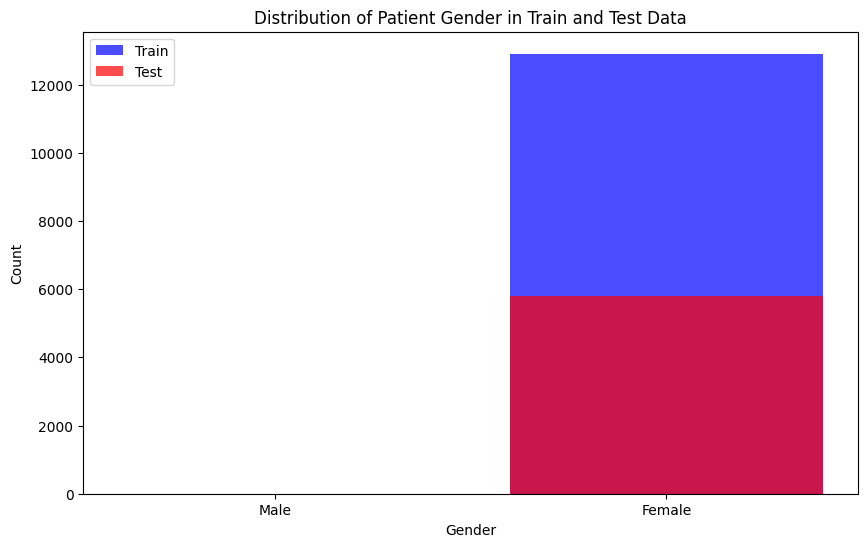

In [ ]:
#Visualisasi patient_gender pada train dan test
# Separate data by gender
train_male = train[train['patient_gender'] == 'M']
train_female = train[train['patient_gender'] == 'F']

test_male = test[test['patient_gender'] == 'M']
test_female = test[test['patient_gender'] == 'F']

# Plotting
plt.figure(figsize=(10, 6))

# Plot train data
plt.bar(['Male', 'Female'], [len(train_male), len(train_female)], color='blue', alpha=0.7, label='Train')

# Plot test data
plt.bar(['Male', 'Female'], [len(test_male), len(test_female)], color='red', alpha=0.7, label='Test')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Patient Gender in Train and Test Data')
plt.legend()

# Show plot
plt.show()

In [ ]:
train = train.drop(['patient_gender', 'female'], axis=1)
test = test.drop(['patient_gender', 'female'], axis=1)
train.shape

(12906, 81)

In the descriptive statistics above, there are several columns that have a missing value of one, here we hypothesize that the missing value data is in 1 row. Therefore, we check the missing value, if the hypothesis is true then the row that has many missing values will be deleted.

In [ ]:
missing_population_data = train[train['population'].isnull()]
missing_population_data
# missing_population_data.isnull().sum().sum()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
10542,224030,Black,MEDICAID,FL,332,41,NaN,C50911,Malignant neoplasm of unsp site of right femal...,C7800,...,NaN,NaN,NaN,NaN,NaN,NaN,35.544993,8.714016,16.558153,0


In [ ]:
train = train.dropna(subset=['population']).reset_index(drop=True)

In [ ]:
target = train['DiagPeriodL90D']
len(target)

12905

In [ ]:
numerical_cols = list(train.select_dtypes(exclude=['object']).columns)
categorical_columns = list(train.select_dtypes(include=['object']).columns)

numerical_cols.remove('patient_zip3')
categorical_columns.append('patient_zip3')

In the 'patient_zip3' column, we check whether the test data contains the code 'patient_zip3' which is not in the train data. After checking, there is data that does not exist in the train data so we change it to None.

In [ ]:
uncommon_zip3 = test[~test['patient_zip3'].isin(train['patient_zip3'])]['patient_zip3']
print(len(uncommon_zip3))
test.loc[test['patient_zip3'].isin(uncommon_zip3), 'patient_zip3'] = None

29


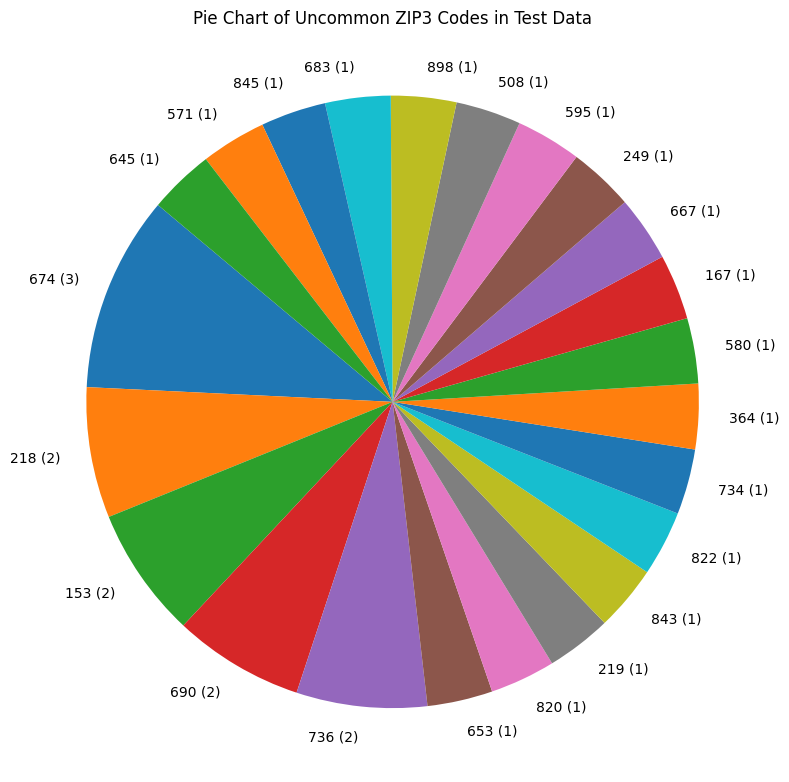

In [ ]:
#Visualisasi kode patient_zip3 yang ada di data test tpi tidak ada di data train
# Hitung jumlah kemunculan nilai unik di uncommon_zip3
uncommon_zip3_counts = uncommon_zip3.value_counts()

# Plotting
plt.figure(figsize=(8, 8))

# Plot pie chart
plt.pie(uncommon_zip3_counts.values, labels=[f"{zip3} ({count})" for zip3, count in zip(uncommon_zip3_counts.index, uncommon_zip3_counts.values)], startangle=140)

# Adding title
plt.title('Pie Chart of Uncommon ZIP3 Codes in Test Data')

# Show plot
plt.axis('equal')  # agar pie chart menjadi lingkaran
plt.tight_layout()
plt.show()

Handling missing values in numeric columns using the median, and in categorical columns using the mode.

In [ ]:
for col in categorical_columns:
    if col != 'DiagPeriodL90D':
        mode = train[col].mode()[0]
        train[col].fillna(mode, inplace=True)
        test[col].fillna(mode, inplace=True)

for col in numerical_cols:
    if col != 'DiagPeriodL90D':
        median = train[col].median()
        train[col].fillna(median, inplace=True)
        test[col].fillna(median, inplace=True)

train['patient_zip3'] = train['patient_zip3'].astype(int)
test['patient_zip3'] = test['patient_zip3'].astype(int)

##NLP Processing
Thanks to @ANOPSY
I used the NLP processing code found in the
https://www.kaggle.com/code/anopsy/nlp-ensemble-on-cleandata

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
whole_df = pd.concat([train.drop(columns=['DiagPeriodL90D']), test])

In [ ]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
whole_df['processed_description'] = whole_df['breast_cancer_diagnosis_desc'].apply(lambda x: ' '.join(word for word in x.lower().split() if word not in stop_words))

#replace some words that are not appropriate
mapping_dict = {
    'malig': 'malignant',
    'unsp': 'unspecified',
    'ovrlp': 'overlapping',
    'neoplm' : 'neoplasm',
    'male' : 'female'
}

def replace_words(text):
    return ' '.join(mapping_dict.get(word, word) for word in text.split())

whole_df['processed_description'] = whole_df['processed_description'].apply(replace_words)
whole_df['tokenized_description'] = whole_df['processed_description'].apply(nltk.word_tokenize)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
whole_df['tokenized_description']

0       [malignant, neoplasm, unspecified, site, unspe...
1       [malignant, neoplasm, upper-outer, quadrant, r...
2       [malignant, neoplasm, central, portion, left, ...
3       [malignant, neoplasm, upper-inner, quadrant, l...
4       [malignant, neoplasm, breast, (, female, ), ,,...
                              ...                        
5787    [malignant, neoplasm, upper-outer, quadrant, r...
5788    [malignant, neoplasm, unspecified, site, left,...
5789    [malignant, neoplasm, upper-outer, quadrant, r...
5790    [malignant, neoplasm, breast, (, female, ), ,,...
5791    [malignant, neoplasm, central, portion, right,...
Name: tokenized_description, Length: 18697, dtype: object

In [ ]:
whole_df['tokenized_description'] = whole_df['tokenized_description'].str.join(' ')

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(whole_df['tokenized_description'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [ ]:
tfidf_df.head()

,areola,axillary,breast,central,female,inner,left,lower,malignant,neoplasm,...,portion,quadrant,right,secondary,site,sites,specified,tail,unspecified,upper
0,0.0,0.0,0.236509,0.000000,0.236787,0.00000,0.000000,0.0,0.236496,0.236496,...,0.000000,0.000000,0.000000,0.0,0.460132,0.0,0.0,0.0,0.751274,0.000000
1,0.0,0.0,0.196362,0.000000,0.196593,0.00000,0.000000,0.0,0.196351,0.196351,...,0.000000,0.436086,0.416483,0.0,0.000000,0.0,0.0,0.0,0.000000,0.483765
2,0.0,0.0,0.150697,0.633324,0.150875,0.00000,0.326976,0.0,0.150689,0.150689,...,0.633324,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.176352,0.000000,0.176559,0.62207,0.382640,0.0,0.176342,0.176342,...,0.000000,0.391647,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.434467
4,0.0,0.0,0.391489,0.000000,0.391950,0.00000,0.000000,0.0,0.391468,0.391468,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.621786,0.000000


In [ ]:
tfidf_df.columns

Index(['areola', 'axillary', 'breast', 'central', 'female', 'inner', 'left',
       'lower', 'malignant', 'neoplasm', 'nipple', 'outer', 'overlapping',
       'portion', 'quadrant', 'right', 'secondary', 'site', 'sites',
       'specified', 'tail', 'unspecified', 'upper'],
      dtype='object')

In [ ]:
whole_df.reset_index(inplace=True)
tokenized_df = pd.concat([whole_df, tfidf_df], axis = 1)

tokenized_df.drop(columns=['index', 'breast_cancer_diagnosis_desc', 'tokenized_description', "patient_id"], inplace=True)

##Feature Engineering

replace some 'breast_cancer_diagnosis_code' codes with icd10

https://www.icd10data.com/

In [ ]:
replacements = {
    'C50922': 'C50912',
    'C50921': 'C50911',
    '1749': 'C50919',
    '1744': 'C50419',
    '1741': 'C50119',
    '1748': 'C50819',
    '1743': 'C50319',
    '1742': 'C50219',
    '1746': 'C50619',
    '19881': 'C7981',
    '1745': 'C50519',
    '1759': 'C50929'
}

for old_val, new_val in replacements.items():
    tokenized_df['breast_cancer_diagnosis_code'] = tokenized_df['breast_cancer_diagnosis_code'].replace(old_val, new_val, regex=True)

perform code splitting on 'breast_cancer_diagnosis_code'

In [ ]:
tokenized_df['breast_cancer_diagnosis_code'] = tokenized_df['breast_cancer_diagnosis_code'].apply(lambda x: x.ljust(6, '0'))
tokenized_df['code1234'] = tokenized_df['breast_cancer_diagnosis_code'].str[1:4]
tokenized_df['code4'] = tokenized_df['breast_cancer_diagnosis_code'].str[3]
tokenized_df['code6'] = tokenized_df['breast_cancer_diagnosis_code'].str[5]
tokenized_df['code45'] = tokenized_df['breast_cancer_diagnosis_code'].str[3] + tokenized_df['breast_cancer_diagnosis_code'].str[4]
tokenized_df['code456'] = tokenized_df['code45'] + tokenized_df['code6']

Feature engineering on columns 'metastatic_cancer_diagnosis_code', 'patient_zip3', 'patient_age'

In [ ]:
pivot_table = tokenized_df.pivot_table(index='metastatic_cancer_diagnosis_code', columns='patient_zip3', values='patient_age', aggfunc='mean', fill_value=0)
pivot_table.columns = pivot_table.columns.astype(str)
pivot_table.head()

patient_zip3,101,103,104,105,106,107,108,109,110,111,...,989,990,991,992,993,994,995,996,998,999
metastatic_cancer_diagnosis_code,,,,,,,,,,,,,,,,,,,,,
C770,0,0.000000,65.266667,48.00000,74.00,64.000000,57.0,58.0,0.0,0.000000,...,0.0,0.000000,0.000,74.000000,0.0,0,0,0,0,0
C771,0,67.000000,40.333333,0.00000,0.00,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000,0.000000,60.0,0,0,0,0,0
C772,0,0.000000,0.000000,0.00000,0.00,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0
C773,62,54.541667,60.768116,58.59375,53.25,59.142857,48.4,54.4,57.3,55.055556,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65
C774,0,0.000000,0.000000,0.00000,0.00,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0


##Feature Selection
Thanks to @ONUR KOÇ

I used his feature selection with some additional modifications found at
https://www.kaggle.com/code/onurkoc83/catboost-joker

In [ ]:
selected_df = tokenized_df[['breast_cancer_diagnosis_code','metastatic_cancer_diagnosis_code', 'patient_zip3','patient_age', 'payer_type',
                            'patient_state','areola', 'axillary', 'breast', 'central', 'female', 'inner',
                            'left', 'lower', 'malignant', 'neoplasm', 'nipple', 'outer', 'overlapping', 'portion', 'quadrant',
                            'right', 'secondary', 'site', 'sites', 'specified', 'tail', 'unspecified', 'upper',
                            'code1234', 'code4', 'code6', 'code45', 'code456'
                            ]]

In [ ]:
train_no_target = selected_df[:12905]
test = selected_df[12905:]

In [ ]:
train = pd.concat([train_no_target.reset_index(drop=True), target.reset_index(drop=True)], axis=1)

train = train.merge(pivot_table, how='left', left_on='metastatic_cancer_diagnosis_code', right_index=True)
test = test.merge(pivot_table, how='left', left_on='metastatic_cancer_diagnosis_code', right_index=True)

In [ ]:
num_cols = train.select_dtypes('number').columns.tolist()
target = 'DiagPeriodL90D'
cat_cols = [c for c in train.columns if c not in num_cols and c != 'DiagPeriodL90D']

In [ ]:
num_cols.remove('DiagPeriodL90D')
num_cols.remove('patient_zip3')
cat_cols.append('patient_zip3')
# cat_cols

In [ ]:
train.head()

,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,patient_zip3,patient_age,payer_type,patient_state,areola,axillary,breast,central,...,989,990,991,992,993,994,995,996,998,999
0,C50919,C7989,924,84,MEDICAID,CA,0.0,0.0,0.236509,0.000000,...,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0
1,C50411,C773,928,62,COMMERCIAL,CA,0.0,0.0,0.196362,0.000000,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65
2,C50112,C773,760,43,COMMERCIAL,TX,0.0,0.0,0.150697,0.633324,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65
3,C50212,C773,926,45,COMMERCIAL,CA,0.0,0.0,0.176352,0.000000,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65
4,C50919,C773,836,55,COMMERCIAL,ID,0.0,0.0,0.391489,0.000000,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65


In [ ]:
test.head()

,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,patient_zip3,patient_age,payer_type,patient_state,areola,axillary,breast,central,...,989,990,991,992,993,994,995,996,998,999
12905,C50412,C773,467,54,MEDICAID,IN,0.0,0.0,0.195575,0.0,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65
12906,C50912,C787,337,52,COMMERCIAL,FL,0.0,0.0,0.258048,0.0,...,0.0,51.000000,0.000,59.000000,61.0,0,0,0,50,0
12907,C50911,C773,917,61,MEDICAID,CA,0.0,0.0,0.259864,0.0,...,54.4,54.166667,56.875,47.777778,58.6,59,56,58,0,65
12908,C50912,C779,917,64,MEDICARE ADVANTAGE,CA,0.0,0.0,0.258048,0.0,...,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0
12909,C50412,C779,900,40,COMMERCIAL,CA,0.0,0.0,0.195575,0.0,...,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0


#Model

In [ ]:
train.shape, test.shape

((12905, 773), (5792, 772))

In [ ]:
def score_model(model, label):

    print('model: {}'.format(label))
    X = train.copy()
    y = X.pop(target)

    skf = StratifiedKFold(n_splits=5,random_state=SEED, shuffle=True)

    val_predictions = np.zeros(len(train))
    score_list = []
    for fold, (trx_idx, val_idx) in enumerate(skf.split(X,y)):
        X_train = X.iloc[trx_idx]
        y_train = y.iloc[trx_idx]
        X_val   = X.iloc[val_idx]
        y_val   = y.iloc[val_idx]

        model.fit(X_train,y_train)
        y_pred_train = model.predict_proba(X_train)[:,1]
        y_pred_val   = model.predict_proba(X_val)[:,1]
        auc_train = roc_auc_score(y_train,y_pred_train)
        auc_val   = roc_auc_score(y_val,y_pred_val)

        val_predictions[val_idx] = y_pred_val
        score_list.append(auc_val)
        print(f'fold: {fold} - AUC Train: {auc_train} - AUC Val {auc_val}')

    print(f'AUC MEAN {np.mean(score_list)} - Std: {np.std(score_list)}')

    return score_list, val_predictions

#Submit

In [ ]:
cat_transformer= Pipeline([('cat',CatBoostEncoder())])
preprocess_othermodels = ColumnTransformer([('cat',cat_transformer,cat_cols)])

In [ ]:
SEED = 42

# hyperparameter tunning results using optuna
params_cat = {'n_estimators': 498,
              'learning_rate': 0.041065977548158134,
              'depth': 7, 'l2_leaf_reg': 1.749992046876115,
              'random_strength': 20,
              'bagging_temperature': 5.652374052219557,
              'border_count': 74,
              'scale_pos_weight': 1.5842586529176916,
              'grow_policy': 'SymmetricTree',
              'logging_level': 'Silent'}

In [ ]:
score_list, oof_list = pd.DataFrame(), pd.DataFrame()

models = [
    ('cb', CatBoostClassifier(cat_features=cat_cols, random_state=SEED, **params_cat)),
    ('logreg', make_pipeline(preprocess_othermodels,
                                  LogisticRegression(random_state=SEED))),
    ('lgbm',make_pipeline(preprocess_othermodels,
                                 LGBMClassifier(random_state=SEED))),
    ('RF',make_pipeline(preprocess_othermodels,
                               RandomForestClassifier(random_state=SEED))),
    ('Extratrees',make_pipeline(preprocess_othermodels,
                                       ExtraTreesClassifier(random_state=SEED))),
    ('XGB',make_pipeline(preprocess_othermodels,
                                 XGBClassifier(random_state=SEED)))
]

for label, model in models:
    score_list[label], oof_list[label] = score_model(model,label)

model: cb
fold: 0 - AUC Train: 0.8470509371470933 - AUC Val 0.8117985080933248
fold: 1 - AUC Train: 0.8514280393821365 - AUC Val 0.8129659007392952
fold: 2 - AUC Train: 0.8454042997308625 - AUC Val 0.8006601034040364
fold: 3 - AUC Train: 0.8481244414312675 - AUC Val 0.8012145108794466
fold: 4 - AUC Train: 0.8507055611359081 - AUC Val 0.8021299874266018
AUC MEAN 0.805753802108541 - Std: 0.005444920592736881
model: logreg
fold: 0 - AUC Train: 0.7297058295369865 - AUC Val 0.7333693762211688
fold: 1 - AUC Train: 0.7439996474134907 - AUC Val 0.7489046291103616
fold: 2 - AUC Train: 0.7316618204027072 - AUC Val 0.7237655150867974
fold: 3 - AUC Train: 0.7363661014719327 - AUC Val 0.7177800269905533
fold: 4 - AUC Train: 0.7305934576716935 - AUC Val 0.7346081504300819
AUC MEAN 0.7316855395677926 - Std: 0.010620396156621992
model: lgbm
[LightGBM] [Info] Number of positive: 6448, number of negative: 3876
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001827

<Axes: >

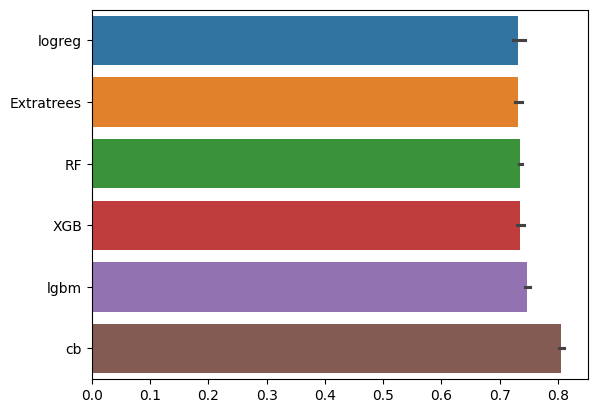

In [ ]:
sns.barplot( data=score_list.reindex(score_list.mean().sort_values().index,axis=1),orient='h' )

In [ ]:
w = RidgeClassifier().fit(oof_list,train.DiagPeriodL90D).coef_[0]
w

array([ 1.99780958, -0.22024979,  0.12925552, -0.11488537,  0.0589314 ,
        0.05794931])

In [ ]:
voter = VotingClassifier(models, weights = w, voting = 'soft')

X = train.copy()
y = X.pop('DiagPeriodL90D')

voter.fit(X,y)

[LightGBM] [Info] Number of positive: 8060, number of negative: 4845
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 12905, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624564 -> initscore=0.508966
[LightGBM] [Info] Start training from score 0.508966


VotingClassifier(estimators=[('cb',
                              <catboost.core.CatBoostClassifier object at 0x79358bb44a30>),
                             ('logreg',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('cat',
                                                                                Pipeline(steps=[('cat',
                                                                                                 CatBoostEncoder())]),
                                                                                ['breast_cancer_diagnosis_code',
                                                                                 'metastatic_cancer_diagnosis_code',
                                                                                 'payer_type',
                                                                                 'patient_state',
                                                                                 'code1234',
                                                                                 'code4',
                                                                                 'code6',
                                                                                 'cod...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))]))],
                 voting='soft',
                 weights=array([ 1.99780958, -0.22024979,  0.12925552, -0.11488537,  0.0589314 ,
        0.05794931]))

#Submission

In [ ]:
sub["DiagPeriodL90D"] = voter.predict_proba(test)[:,1]
sub.to_csv('submission.csv',index=False)

In [ ]:
sub

,patient_id,DiagPeriodL90D
0,573710,0.845561
1,593679,0.899752
2,184532,0.841093
3,447383,0.841104
4,687972,0.821424
...,...,...
5787,977076,0.895885
5788,922960,0.897077
5789,759690,0.930210
5790,911717,0.120373


In [ ]:
sub.describe()

,patient_id,DiagPeriodL90D
count,5792.000000,5792.000000
mean,549946.787983,0.681732
std,260988.833446,0.310943
min,100266.000000,0.014365
25%,320284.500000,0.648899
50%,553042.000000,0.842693
75%,778552.250000,0.881817
max,999890.000000,1.001928
